## **Downloading data**

In [34]:
import numpy as np
import gzip
import struct
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import glob
from skimage import feature
from skimage import exposure
from tqdm.notebook import tqdm
import pickle
from PIL import Image
import os, sys
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load Data**

In [3]:
tr_pos_fpath = "/content/drive/MyDrive/INRIA Dataset Samples/Train Pos/*.*"
tr_neg_fpath = "/content/drive/MyDrive/INRIA Dataset Samples/Train Neg/*.*"
te_pos_fpath = "/content/drive/MyDrive/INRIA Dataset Samples/Test Pos/*.*"
te_neg_fpath = "/content/drive/MyDrive/INRIA Dataset Samples/Test Neg/*.*"


In [4]:
#reading training images
train_pos_img = [cv2.imread(img) for img in sorted(glob.glob(tr_pos_fpath))]
train_neg_img = [cv2.imread(img) for img in sorted(glob.glob(tr_neg_fpath))]

In [5]:
#reading test images
test_pos_img = [cv2.imread(img) for img in sorted(glob.glob(te_pos_fpath))]
test_neg_img = [cv2.imread(img) for img in sorted(glob.glob(te_neg_fpath))]

In [6]:
print("Training Positive Samples : " +  str(len(train_pos_img)))
print("Training Negative Samples : " +  str(len(train_neg_img)))
print("Test Positive Samples : " +  str(len(test_pos_img)))
print("Test Negative Samples : " +  str(len(test_neg_img)))

Training Positive Samples : 2416
Training Negative Samples : 1218
Test Positive Samples : 1132
Test Negative Samples : 453


**Visualize Dataset**:

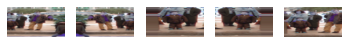

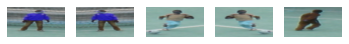

In [15]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train_pos_img[i])
    plt.axis('off')
plt.show()

for i in range(5):  
    plt.subplot(1,5,i+1)
    plt.imshow(test_pos_img[i])
    plt.axis('off')
plt.show()

**Computing HoG features**<br>

In [16]:
def compute_HOG(image):
  (H1, hogImage1) = feature.hog(image, orientations = 3,
                                pixels_per_cell  = (2, 2), cells_per_block  = (2, 2), transform_sqrt=True,
                                block_norm  = 'L1' , visualize=True)
  return (H1, hogImage1)

In [17]:
#initialize list that contains training images
train_pos_data = []
train_pos_label = []
# count of all positive training images to use in loop
train_pos_img_count = len(train_pos_img)

# loop over the images
for i in tqdm(range(0,train_pos_img_count)):
  # pre-process image here if needed
  # Computing the HOG features. Also Keep and eye on the parameters used in this function call.
  (h_vector, h_image) = compute_HOG(train_pos_img[i])
  #append computed HOGs in train data
  train_pos_data.append(h_vector)
  train_pos_label.append(1)


In [48]:
#initialize list that contains training images
train_neg_data = []
train_neg_label = []
# count of all positive training images to use in loop
train_neg_img_count = len(train_neg_img)

# loop over the images
for i in tqdm(range(0,train_neg_img_count)):
  # pre-process image here if needed
  # Computing the HOG features. Also Keep and eye on the parameters used in this function call.
  (h_vector, h_image) = compute_HOG(train_neg_img[i])
  #append computed HOGs in train data
  train_neg_data.append(h_vector)
  train_neg_label.append(0)


In [19]:
#initialize list that contains training images
test_pos_data = []
test_pos_label = []
# count of all positive training images to use in loop
test_pos_img_count = len(test_pos_img)

# loop over the images
for i in tqdm(range(0,test_pos_img_count)):
  # pre-process image here if needed
  # Computing the HOG features. Also Keep and eye on the parameters used in this function call.
  (h_vector, h_image) = compute_HOG(test_pos_img[i])
  #append computed HOGs in train data
  test_pos_data.append(h_vector)
  test_pos_label.append(1)


In [20]:
#initialize list that contains training images
test_neg_data = []
test_neg_label = []
# count of all positive training images to use in loop
test_neg_img_count = len(test_neg_img)

# loop over the images
for i in tqdm(range(0,test_neg_img_count)):
  # pre-process image here if needed
  # Computing the HOG features. Also Keep and eye on the parameters used in this function call.
  (h_vector, h_image) = compute_HOG(test_neg_img[i])
  #append computed HOGs in train data
  test_neg_data.append(h_vector)
  test_neg_label.append(0)

#get train labels
# train_label = train_lbl[0:train_img_count]

# Combining negative and positive features and labels

In [49]:
train_pos_df = pd.DataFrame(list(zip(train_pos_data,train_pos_label)), columns = ["data", "label"])
train_neg_df = pd.DataFrame(list(zip(train_neg_data,train_neg_label)), columns = ["data", "label"])
test_pos_df = pd.DataFrame(list(zip(test_pos_data,test_pos_label)), columns = ["data", "label"])
test_neg_df = pd.DataFrame(list(zip(test_neg_data,test_neg_label)), columns = ["data", "label"])

In [50]:
train_df = train_pos_df.append(train_neg_df, ignore_index = True)
test_df = test_pos_df.append(test_neg_df, ignore_index = True)

In [54]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [60]:
train_dat = list(train_df.data)
train_lab = list(train_df.label)
test_dat = list(test_df.data)
test_lab = list(test_df.label)

#SVM 
**Training**

In [59]:
#train_data --> contains vector histogram of train images
#train_labels --> contains labels of train images
#test_data --> contains histogram of test images
#test_label --> contains labels of test

from sklearn.svm import LinearSVC

# load linear SVM
modelSVC = LinearSVC(max_iter=3000)
modelSVC.fit(train_dat, train_lab)
print("SVC training completed")

SVC training completed


**Testing**
<br>
Lets prepare testing data before evaluations and predictions

In [61]:
# Create predictions
predicted_labels = modelSVC.predict(test_dat)
print("Prediction completed")
# uncomment below lines to get the predicted labesl and the actural labels printed.
print("Comparing predicted and actual labels")
print(predicted_labels[0:10])
print(test_lab[0:10])

Prediction completed
Comparing predicted and actual labels
[1 1 1 0 0 1 1 1 1 1]
[1, 1, 1, 0, 0, 1, 1, 1, 1, 1]


**Computing performance measures**

In [62]:
mask = predicted_labels==test_lab
correct = np.count_nonzero(mask)
print (correct*100.0/predicted_labels.size)
result = predicted_labels.astype(int)

92.80757097791798


**Confusion Matrix**

In [81]:
act = pd.Series(test_lab,name='Actual')
pred = pd.Series(predicted_labels,name='Predicted')
confusion_matrix = pd.crosstab(act, pred,margins=True)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted    0     1   All
Actual                    
0          444     9   453
1          105  1027  1132
All        549  1036  1585


Plotting above created Confusion Matrix

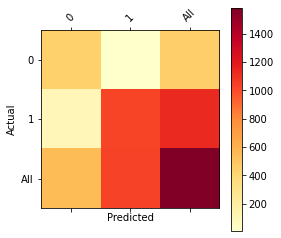

In [82]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.YlOrRd):
  plt.matshow(df_confusion, cmap=cmap) # imshow
  plt.colorbar()
  tick_marks = np.arange(len(df_confusion.columns))
  plt.xticks(tick_marks, df_confusion.columns, rotation=45)
  plt.yticks(tick_marks, df_confusion.index)
  plt.ylabel(df_confusion.index.name)
  plt.xlabel(df_confusion.columns.name)
#call function
plot_confusion_matrix(confusion_matrix)

**Classification Report**

In [66]:
from sklearn.metrics import classification_report
print(classification_report(test_lab, predicted_labels, target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       453
           1       0.99      0.91      0.95      1132

    accuracy                           0.93      1585
   macro avg       0.90      0.94      0.92      1585
weighted avg       0.94      0.93      0.93      1585



Classifying a set of examples

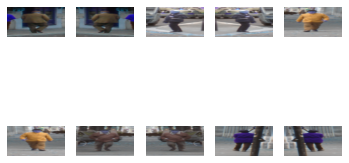

Predicted label: [1, 1, 1, 1, 1]
Predicted label: [1, 1, 1, 1, 1]


In [124]:
svm_test = test_pos_img[10:20]
svm_labl = test_pos_label[10:20]
svm_HOG = []
for img in svm_test:
  (h_vector, h_image) = compute_HOG(img)
  svm_HOG.append(h_vector)
svm_preds = modelSVC.predict(svm_HOG)
for i in range(len(svm_HOG)):
    plt.subplot(2,5,i+1)
    plt.imshow(svm_test[i])
    plt.axis('off')
plt.show()
print('Predicted label: %s' % (svm_labl[0:5],))
print('Predicted label: %s' % (svm_labl[5:10],))

#XGBoost Classifier

In [78]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [74]:
tr_data = np.array(train_dat)
tr_label = np.array(train_lab)
te_data = np.array(test_dat)
te_label = np.array(test_lab)

In [73]:
# fit model no training data
model = XGBClassifier()
model.fit(tr_data,tr_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [75]:
y_pred = model.predict(te_data)

In [76]:
predictions = [round(value) for value in y_pred]

In [79]:
accuracy = accuracy_score(te_label, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.60%


In [84]:
act = pd.Series(test_lab,name='Actual')
pred = pd.Series(predictions,name='Predicted')
confusion_matrix_XG = pd.crosstab(act, pred,margins=True)
print("Confusion matrix:\n%s" % confusion_matrix_XG)

Confusion matrix:
Predicted    0     1   All
Actual                    
0          434    19   453
1           19  1113  1132
All        453  1132  1585


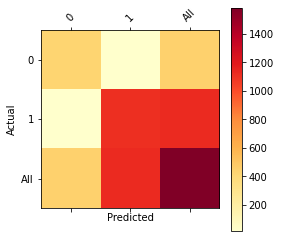

In [85]:
plot_confusion_matrix(confusion_matrix_XG)

In [86]:
print(classification_report(test_lab, predictions, target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       453
           1       0.98      0.98      0.98      1132

    accuracy                           0.98      1585
   macro avg       0.97      0.97      0.97      1585
weighted avg       0.98      0.98      0.98      1585



Classifying a set of examples

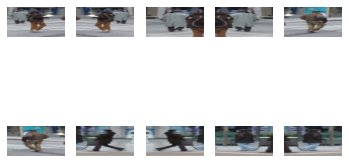

Predicted label: [1, 1, 1, 1, 1]
Predicted label: [1, 1, 1, 1, 1]


In [127]:
xg_test = test_pos_img[20:30]
xg_labl = test_pos_label[20:30]
xg_HOG = []
for img in xg_test:
  (h_vector, h_image) = compute_HOG(img)
  xg_HOG.append(h_vector)
xg_preds = model.predict(xg_HOG)
for i in range(len(xg_HOG)):
    plt.subplot(2,5,i+1)
    plt.imshow(xg_test[i])
    plt.axis('off')
plt.show()
print('Predicted label: %s' % (xg_labl[0:5],))
print('Predicted label: %s' % (xg_labl[5:10],))

#Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=2500)
clf.fit(train_dat, train_lab)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [96]:
predictionsRF = clf.predict(test_dat)

In [98]:
mask = predictionsRF==test_lab
correct = np.count_nonzero(mask)
print (correct*100.0/predicted_labels.size)
result = predictionsRF.astype(int)

83.78548895899054


In [99]:
act = pd.Series(test_lab,name='Actual')
pred = pd.Series(predictionsRF,name='Predicted')
confusion_matrixRF = pd.crosstab(act, pred,margins=True)
print("Confusion matrix:\n%s" % confusion_matrixRF)

Confusion matrix:
Predicted    0     1   All
Actual                    
0          197   256   453
1            1  1131  1132
All        198  1387  1585


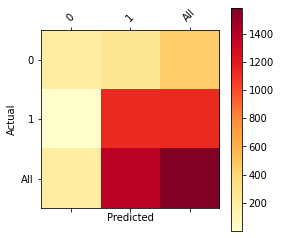

In [100]:
plot_confusion_matrix(confusion_matrixRF)

In [101]:
print(classification_report(test_lab, predictionsRF, target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.99      0.43      0.61       453
           1       0.82      1.00      0.90      1132

    accuracy                           0.84      1585
   macro avg       0.91      0.72      0.75      1585
weighted avg       0.87      0.84      0.81      1585



Classifying a set of examples

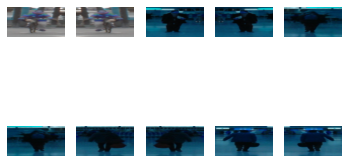

Predicted label: [1, 1, 1, 1, 1]
Predicted label: [1, 1, 1, 1, 1]


In [129]:
rf_test = test_pos_img[50:60]
rf_labl = test_pos_label[50:60]
rf_HOG = []
for img in rf_test:
  (h_vector, h_image) = compute_HOG(img)
  rf_HOG.append(h_vector)
rf_preds = clf.predict(rf_HOG)
for i in range(len(rf_HOG)):
    plt.subplot(2,5,i+1)
    plt.imshow(rf_test[i])
    plt.axis('off')
plt.show()
print('Predicted label: %s' % (rf_labl[0:5],))
print('Predicted label: %s' % (rf_labl[5:10],))